<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [4]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [5]:
total_alpha_content = [ i / 1000 for i in range( 1 , 10 ) ]
total_flat_content  = [ i for i in range(1 , 2  ) ]
total_location      = list(range( 8 , 16))

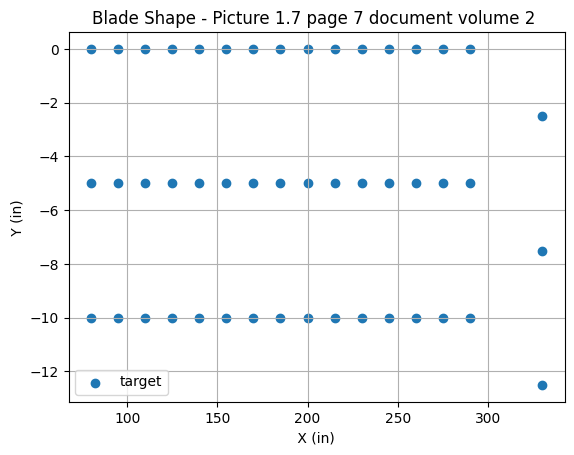

In [6]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [13]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.001 | iter_flat : 1 
iter_alpha : 0.001 , flap: 1 , locate : 8 ,  iteration : 0 
Error in Simulation Health for Each Blade :  -3.8985214200593212
Error in Simulation Fault for Each Blade :  -1.1267755808489586  --- MSE Fault S ----  0.19099725179016783
Error in Simulation Fault T  for Each Blade :  -1.1267755808489586  --- Mean Squared Error Fault T :  7.55627922810682
 ----- for each Blade Simulated ----- 
iter_alpha : 0.001 , flap: 1 , locate : 8 ,  iteration : 1 
Error in Simulation Health for Each Blade :  0.4796517920463397
Error in Simulation Fault for Each Blade :  0.008417827646165055  --- MSE Fault S ----  0.009551991030586444
Error in Simulation Fault T  for Each Blade :  0.008417827646165055  --- Mean Squared Error Fault T :  10.31413566073769
 ----- for each Blade Simulated ----- 
iter_alpha : 0.001 , flap: 1 , locate : 8 ,  iteration : 2 
Error in Simulation Health for Each Blade :  -1.5373440401105087
Error in Simulation Fault for Each Blade :  -1.233893216

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


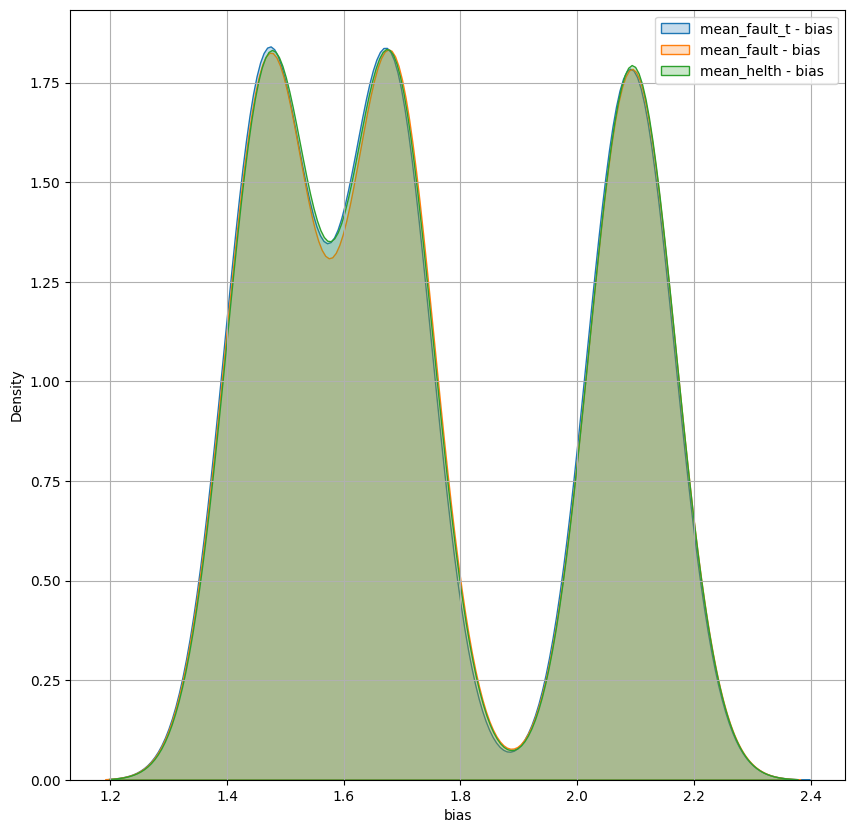

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:382: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:383: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_params_fault[element] , la

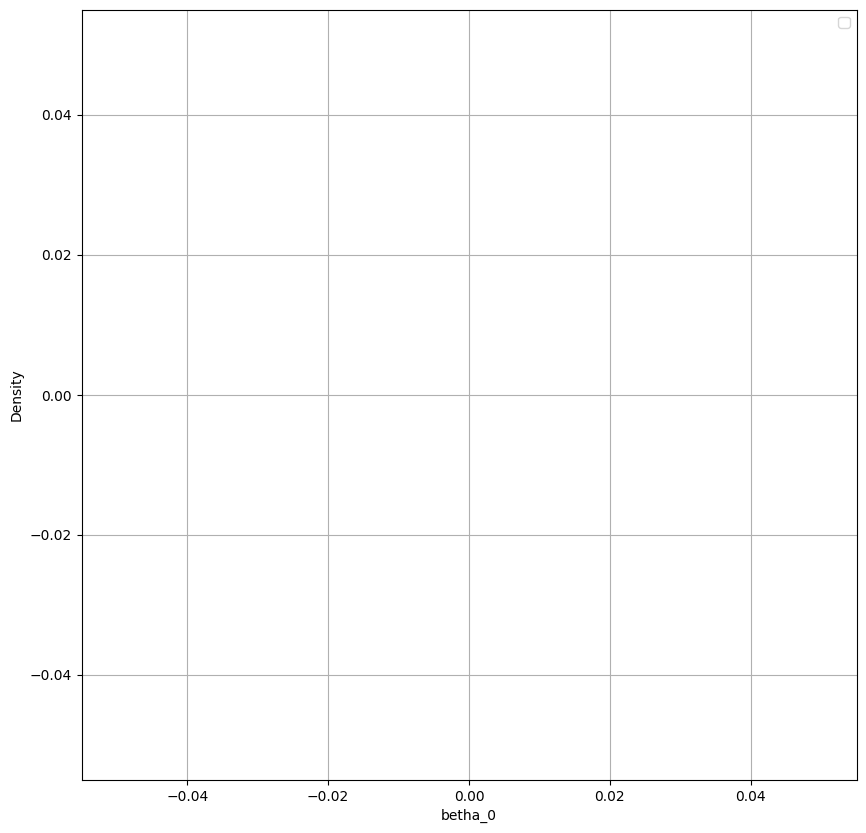

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


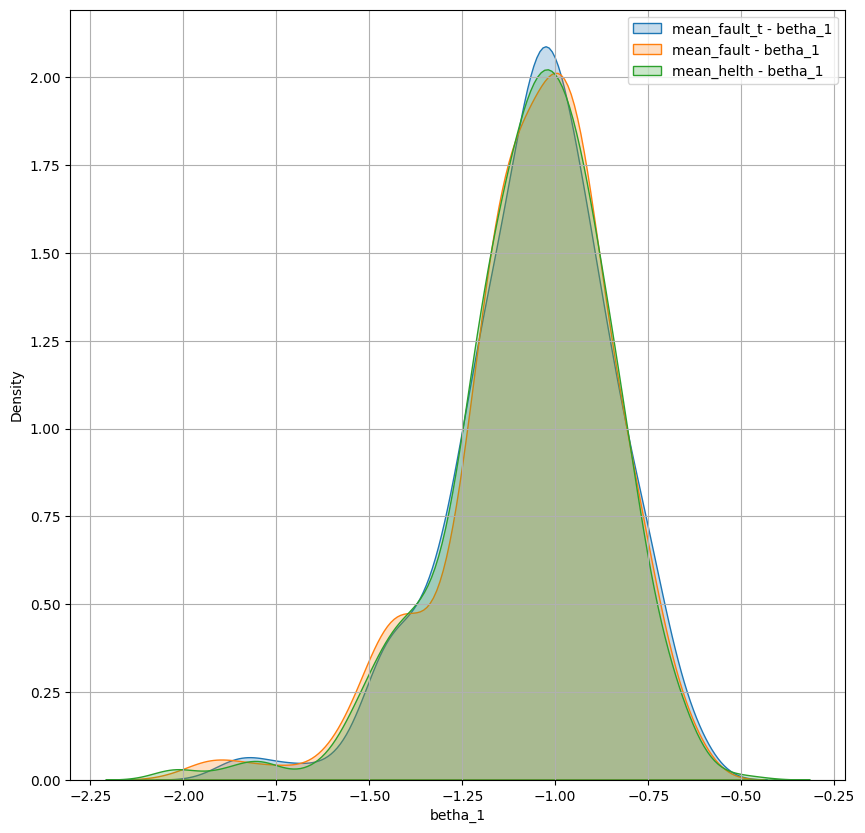

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


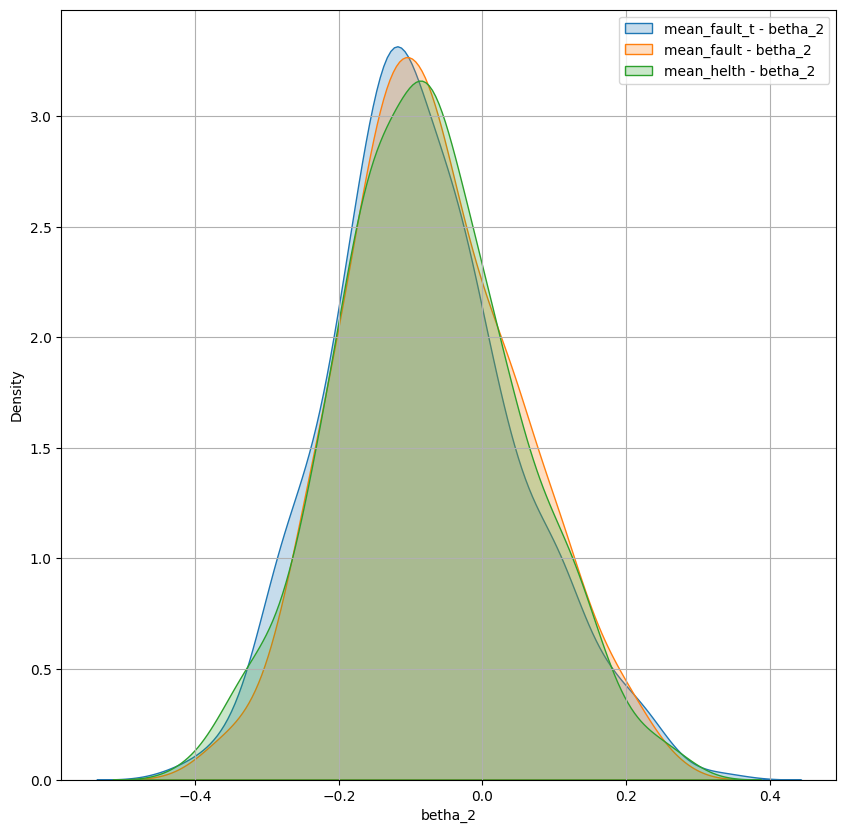

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


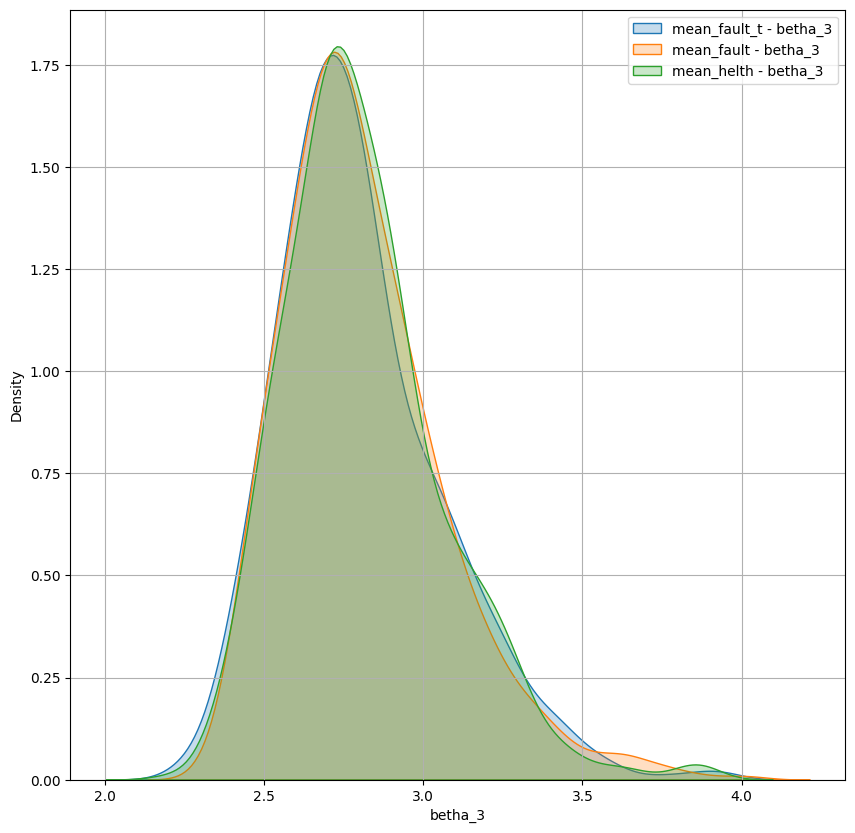

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


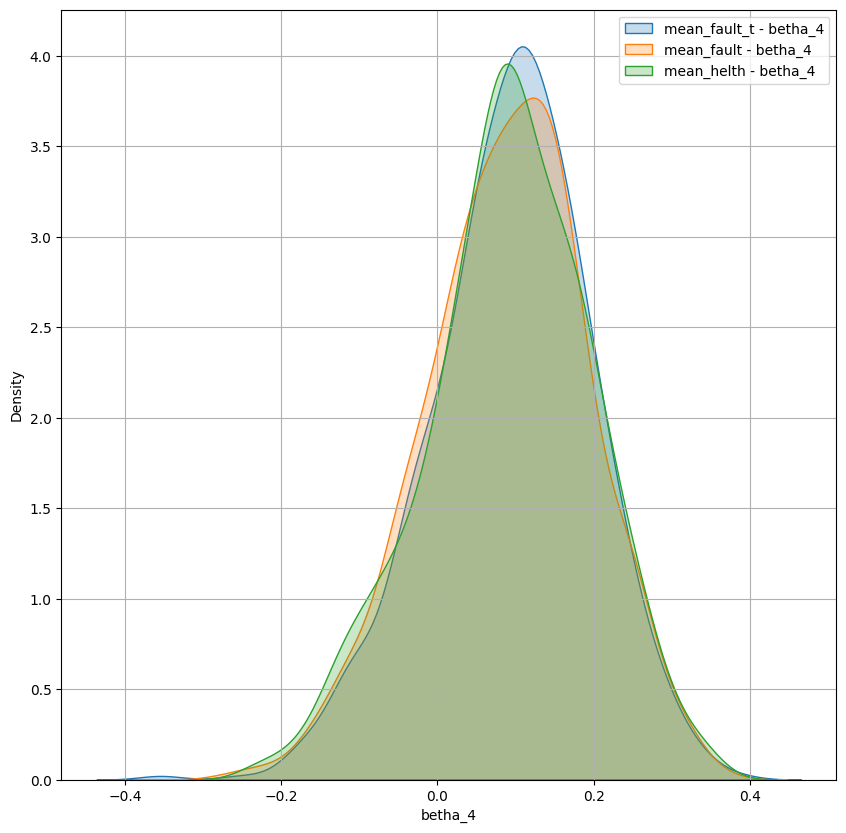

<ipython-input-12-1a8ad56cee88>:382: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-12-1a8ad56cee88>:383: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-12-1a8ad56cee88>:384: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )


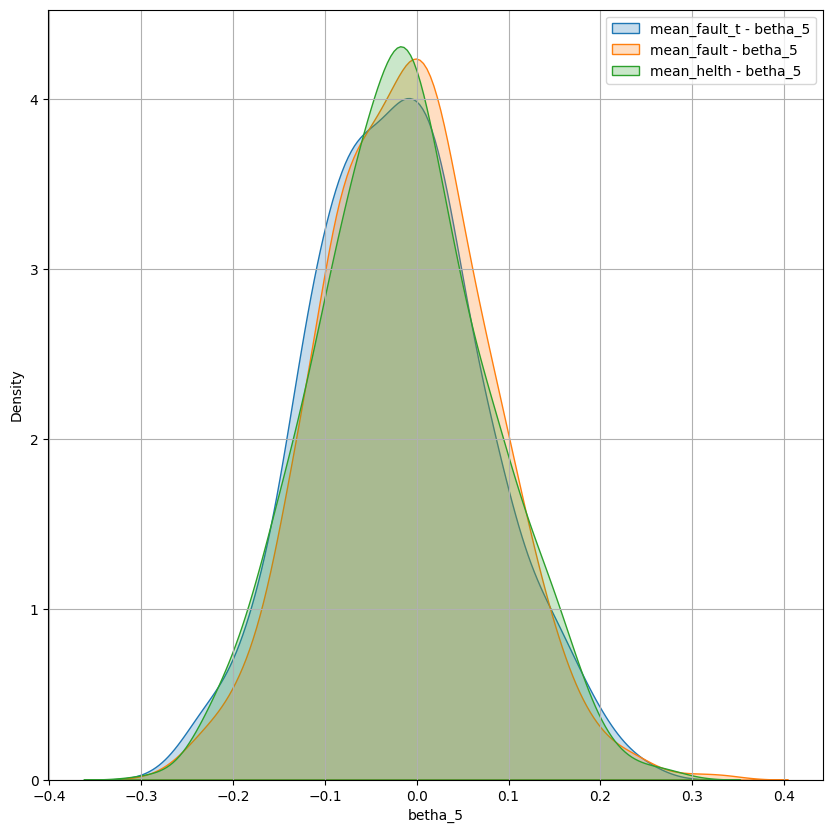

accuracy Nave Bays : 0.6481481481481481


NameError: name 'y_train' is not defined

In [12]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health  = []
    params_fault   = []
    params_fault_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(30):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location = 0

          total_health_iter  = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []


          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              if select_location == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add










              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])

          #fig = plt.figure(figsize=(20 , 10 ))

          #ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          #ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          #ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )

          #ax6 = fig.add_subplot(3 , 6 , 1 )
          #ax7 = fig.add_subplot(3 , 6 , 2 )
          #ax8 = fig.add_subplot(3 , 6 , 3 )

          #ax3 = fig.add_subplot(1 , 6 , 4 )
          #ax4 = fig.add_subplot(1 , 6 , 5 )
          #ax5 = fig.add_subplot(1 , 6 , 6 )





          total_health_iter = np.array(total_health_iter)
          total_health_iter = np.array(total_health_iter)
          total_fault_iter = np.array(total_fault_iter)
          total_fault_t_iter = np.array(total_fault_t_iter)
          print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")
          #ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='H' , c='r' , s = 30   )
          #ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='F1' , c ='b'  , s = 30  )
          #ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='F1' , c ='b', s = 30    )
          #ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='F2' , c='r' , s = 30 )
          #ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='F2' , c='r'  , s = 30  )

          #ax3.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  ,       label='H' , c ='b'  )
          #ax3.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  ,       label='F1' , c ='r' )
          #ax3.set_xlabel("axis x ")
          #ax3.set_ylabel("axis y ")

          #ax4.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  ,       label='H' , c ='b',  )
          #ax4.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F2' , c='r' ,  )
          #ax4.set_xlabel("axis x")
          #ax4.set_ylabel("axis y")

          #ax5.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  ,       label='F1' , c ='b' ,  )
          #ax5.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F2' , c='r' ,  )
          #ax5.set_xlabel("axis x ")
          #ax5.set_ylabel("axis y ")
          #ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ]  , label='H' , c='b' , s = 20 , alpha = 0.2  )
          #ax6.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 1 ]  , label='F_S' , c='r' , s = 10 , alpha = 0.5  )
          #ax6.set_xlabel("axis  x ")
          #ax6.set_ylabel("axis  y ")

          #ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ]  , label='H' , c='b' , s = 20 , alpha = 0.2 )
          #ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 1 ]  , label='F_T' , c='r' , s = 10 , alpha = 0.5  )
          #ax7.set_xlabel("axis  x ")
          #ax7.set_ylabel("axis  y ")

          #ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 1 ]  , label='F_S' , c='b' , )
          #ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 1 ]  , label='F_T' , c='r')
          #ax8.set_xlabel("axis  x ")
          #ax8.set_ylabel("axis  y ")


          #ax0.legend()
          #ax0.grid()
          #ax1.legend()
          #ax1.grid()
          #ax2.legend()
          #ax2.grid()
          #ax3.legend()
          #ax3.grid()

          #ax4.legend()
          #ax4.grid()
          #ax5.legend()
          #ax5.grid()


          #ax6.legend()
          #ax6.grid()

          #ax7.legend()
          #ax7.grid()
          #ax8.legend()
          #ax8.grid()

          #plt.show()




          new_data_simulated_        = np.array(new_data_simulated_)
          new_data_simulated_fault   = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t = np.array(new_data_simulated_fault_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("Error in Simulation Health for Each Blade : " , total_error_health )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]
          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- MSE Fault S ---- " ,  mean_squared_error(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- Mean Squared Error Fault T : " ,  mean_squared_error(z_predict_fault, z_test_fault)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())



    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'error' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'error' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    for element in check_columns :
      fig = plt.figure(figsize = (10 , 10 ))
      ax0 = fig.add_subplot(111 )
      sns.kdeplot( df_params[element]  , label=f'mean_fault_t - {element}'  , shade=True )
      sns.kdeplot(df_params_fault[element] , label=f'mean_fault - {element} '  , shade=True  )
      sns.kdeplot(df_params_fault_t[element] , label=f'mean_helth - {element} ' ,  shade=True  )
      plt.legend()
      plt.grid()
      plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features_RF'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth_RF'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion_RF'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(X_train,y_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train)
    new_y_u_test_cat  = to_categorical(y_u_test)

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(3 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.show()

    print(model_learning.evaluate(x_u_test , new_y_u_test_cat) )

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")



    if iter_alpha > 0.001 :
      break




